# Final Project

## Abigail Buckley


In [1]:
#copied and pasted the first cell from the data_visualization notebook with all the import statements

#visualization tools
import matplotlib.pyplot as plt #matplotlib is a basic plotting library
import seaborn as sns #seaborn is a library that uses matplotlib to make styled plots
import plotly_express as px #plotly express is a library for drawing interactive figures
import hypertools as hyp #hypertools is a library for visualizing "high-dimensional" data

#data wrangling tools
import pandas as pd
import numpy as np

%matplotlib inline

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/__init__.py:10: UserWarning:

Could not switch backend to TkAgg.  This may impact performance of the plotting functions.

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



# Import the datasets

In [2]:
financial_aid = pd.read_csv('financial-aid.csv')
financial_aid = pd.DataFrame(financial_aid)

grad_rates = pd.read_csv('grad-rates.csv')
grad_rates = pd.DataFrame(grad_rates)

cost_attendance = pd.read_csv('cost-attendance.csv')
cost_attendance = pd.DataFrame(cost_attendance)

institutions = pd.read_csv('institutions.csv')
institutions1 = pd.DataFrame(institutions)

# I created smaller dataframes with just the ivy league schools

In [3]:
#financial_aid = financial_aid[(financial_aid['UnitID'] == 182670) ^ (financial_aid['UnitID'] == 190415)
  #                           ^ (financial_aid['UnitID'] == 166027) ^ (financial_aid['UnitID'] == 130794)
   #                          ^ (financial_aid['UnitID'] == 186131) ^ (financial_aid['UnitID'] == 190150)
    #                        ^ (financial_aid['UnitID'] == 217156) ^ (financial_aid['UnitID'] == 215062)] 

grad_rates = grad_rates[(grad_rates['UnitID'] == 182670) ^ (grad_rates['UnitID'] == 190415)
                             ^ (grad_rates['UnitID'] == 166027) ^ (grad_rates['UnitID'] == 130794)
                             ^ (grad_rates['UnitID'] == 186131) ^ (grad_rates['UnitID'] == 190150)
                            ^ (grad_rates['UnitID'] == 217156) ^ (grad_rates['UnitID'] == 215062)] 
                              
#cost_attendance = cost_attendance[(cost_attendance['UnitID'] == 182670) ^ (cost_attendance['UnitID'] == 190415)
#                             ^ (cost_attendance['UnitID'] == 166027) ^ (cost_attendance['UnitID'] == 130794)
 #                            ^ (cost_attendance['UnitID'] == 186131) ^ (cost_attendance['UnitID'] == 190150)
  #                          ^ (cost_attendance['UnitID'] == 217156) ^ (cost_attendance['UnitID'] == 215062)] 

institutions = institutions1[(institutions1['UnitID'] == 182670) ^ (institutions1['UnitID'] == 190415)
                             ^ (institutions1['UnitID'] == 166027) ^ (institutions1['UnitID'] == 130794)
                             ^ (institutions1['UnitID'] == 186131) ^ (institutions1['UnitID'] == 190150)
                            ^ (institutions1['UnitID'] == 217156) ^ (institutions1['UnitID'] == 215062)] 

In [4]:
college_combined = financial_aid.merge(grad_rates)
college_combined.head()

,UnitID,Institution Name,Institution name alias (HD2016),Street address or post office box (HD2016),City location of institution (HD2016),State abbreviation (HD2016),Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort (SFA1516),Number of full-time first-time undergraduates awarded federal state local or institutional grant aid (SFA1516),Percent of full-time first-time undergraduates awarded federal state local or institutional grant aid (SFA1516),Total amount of federal state local or institutional grant aid awarded to full-time first-time undergraduates (SFA1516),...,American Indian or Alaska Native total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),Asian total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),Black or African American total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),Hispanic total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),Native Hawaiian or Other Pacific Islander total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),White total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),Race/ethnicity unknown total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),Two or more races total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),Nonresident alien total (GR2011 Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE),Grand total (GR2016 Degree/certif-seeking students ( 2-yr institution) Completers within 150% of normal time total)
0,217156,Brown University,,One Prospect Street,Providence,RI,1613.0,693.0,43.0,27800328.0,...,85.7,95.8,90.6,89.4,NaN,96.6,95.8,100.0,92.9,NaN
1,190150,Columbia University in the City of New York,Columbia University,West 116 St and Broadway,New York,NY,1423.0,748.0,53.0,34502659.0,...,66.7,95.7,90.6,92.4,NaN,91.8,95.5,90.9,94.1,NaN
2,190415,Cornell University,,300 Day Hall,Ithaca,NY,3180.0,1562.0,49.0,55364608.0,...,64.7,95.3,84.8,94.1,NaN,94.6,100.0,94.0,88.3,NaN
3,182670,Dartmouth College,Dartmouth Big Green,207 Parkhurst Hall,Hanover,NH,1112.0,521.0,47.0,23896735.0,...,78.8,97.0,85.2,95.7,100.0,96.7,93.5,100.0,92.9,NaN
4,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,1659.0,915.0,55.0,44098630.0,...,100.0,99.1,94.0,95.3,NaN,97.9,96.8,100.0,97.4,NaN


In [5]:
college_combined = college_combined.drop(['Institution name alias (HD2016)', 'Street address or post office box (HD2016)', 
        'City location of institution (HD2016)', 'State abbreviation (HD2016)'],axis=1) #drop irrelevant columns 

college_combined = college_combined.merge(institutions)

college_combined.head()



,UnitID,Institution Name,Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort (SFA1516),Number of full-time first-time undergraduates awarded federal state local or institutional grant aid (SFA1516),Percent of full-time first-time undergraduates awarded federal state local or institutional grant aid (SFA1516),Total amount of federal state local or institutional grant aid awarded to full-time first-time undergraduates (SFA1516),Average amount of federal state local or institutional grant aid awarded (SFA1516),Number of full-time first-time undergraduates awarded Pell grants (SFA1516),Percent of full-time first-time undergraduates awarded Pell grants (SFA1516),Total amount of Pell grant aid awarded to full-time first-time undergraduates (SFA1516),...,Grand total (EF2016A All students Undergraduate total),American Indian or Alaska Native total (EF2016A All students Undergraduate total),Asian total (EF2016A All students Undergraduate total),Black or African American total (EF2016A All students Undergraduate total),Hispanic total (EF2016A All students Undergraduate total),Native Hawaiian or Other Pacific Islander total (EF2016A All students Undergraduate total),White total (EF2016A All students Undergraduate total),Two or more races total (EF2016A All students Undergraduate total),Race/ethnicity unknown total (EF2016A All students Undergraduate total),Nonresident alien total (EF2016A All students Undergraduate total)
0,217156,Brown University,1613.0,693.0,43.0,27800328.0,40116.0,211.0,13.0,940820.0,...,6926.0,32.0,972.0,434.0,779.0,13.0,2910.0,418.0,509.0,859.0
1,190150,Columbia University in the City of New York,1423.0,748.0,53.0,34502659.0,46127.0,249.0,17.0,1157602.0,...,8124.0,33.0,1437.0,603.0,1066.0,6.0,3025.0,450.0,188.0,1316.0
2,190415,Cornell University,3180.0,1562.0,49.0,55364608.0,35445.0,484.0,15.0,2162961.0,...,14566.0,64.0,2664.0,917.0,1815.0,13.0,5723.0,654.0,1162.0,1554.0
3,182670,Dartmouth College,1112.0,521.0,47.0,23896735.0,45867.0,164.0,15.0,736377.0,...,4310.0,98.0,654.0,293.0,390.0,11.0,2136.0,219.0,125.0,384.0
4,166027,Harvard University,1659.0,915.0,55.0,44098630.0,48195.0,266.0,16.0,1282272.0,...,9915.0,33.0,1697.0,660.0,1069.0,11.0,4312.0,584.0,333.0,1216.0


In [6]:
financial_aid['Percent of full-time first-time undergraduates receiving federal  state  local or institutional grant aid (SFA0910)'].head()

0    97.0
1    98.0
2    77.0
3     NaN
4    79.0
Name: Percent of full-time first-time undergraduates receiving federal  state  local or institutional grant aid (SFA0910), dtype: float64

# There is a surprisingly large range in what percentage of students at some ivies and receive aid and which ones do not. Unsurprising that Harvard is highest, but I didn't extend Brown to have the least

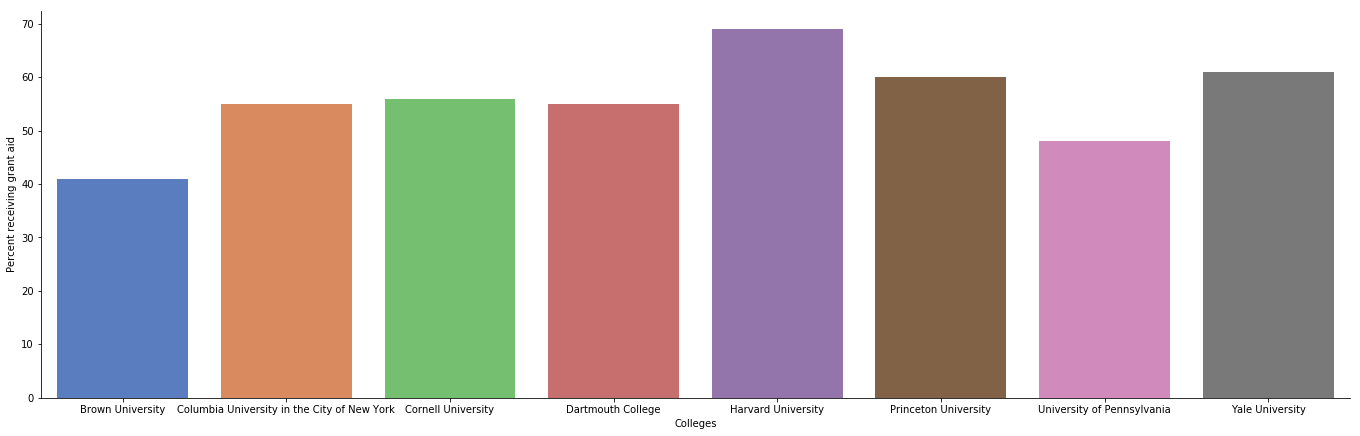

In [7]:
fig = sns.catplot(x="Institution Name", y="Percent of full-time first-time undergraduates receiving federal  state  local or institutional grant aid (SFA0910)", 
            kind = "bar", data=college_combined, palette='muted', legend_out=True, height=7, aspect=19/7)
fig.set_axis_labels('Colleges', 'Percent receiving grant aid')



#Average amount of federal  state  local or institutional grant aid awarded (SFA1011)



# Among ivy league schools, I then visualized the percentage of students receiving aid, how much aid they received, and the size of each schools undergraduate body.

In [18]:
px.scatter(college_combined, x="Institution Name", y="Percent of full-time first-time undergraduates receiving federal  state  local or institutional grant aid (SFA0910)", 
           color="Average amount of federal  state  local or institutional grant aid awarded (SFA1011)", 
           size= "Grand total (EF2016  All students  Undergraduate total)")

In [9]:
college_combined.describe()

,UnitID,Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort (SFA1516),Number of full-time first-time undergraduates awarded federal state local or institutional grant aid (SFA1516),Percent of full-time first-time undergraduates awarded federal state local or institutional grant aid (SFA1516),Total amount of federal state local or institutional grant aid awarded to full-time first-time undergraduates (SFA1516),Average amount of federal state local or institutional grant aid awarded (SFA1516),Number of full-time first-time undergraduates awarded Pell grants (SFA1516),Percent of full-time first-time undergraduates awarded Pell grants (SFA1516),Total amount of Pell grant aid awarded to full-time first-time undergraduates (SFA1516),Average amount of Pell grant aid awarded to full-time first-time undergraduates (SFA1516),...,Grand total (EF2016A All students Undergraduate total),American Indian or Alaska Native total (EF2016A All students Undergraduate total),Asian total (EF2016A All students Undergraduate total),Black or African American total (EF2016A All students Undergraduate total),Hispanic total (EF2016A All students Undergraduate total),Native Hawaiian or Other Pacific Islander total (EF2016A All students Undergraduate total),White total (EF2016A All students Undergraduate total),Two or more races total (EF2016A All students Undergraduate total),Race/ethnicity unknown total (EF2016A All students Undergraduate total),Nonresident alien total (EF2016A All students Undergraduate total)
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000e+00,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000
mean,184800.625000,1755.500000,885.750000,50.750000,3.811279e+07,43982.500000,268.250000,15.500000,1.223987e+06,4560.250000,...,8303.625000,38.500000,1469.125000,569.500000,929.000000,8.625000,3516.250000,414.625000,357.000000,1001.00000
std,27511.639427,688.276107,332.594884,5.203021,1.108863e+07,4325.008175,98.783674,1.511858,4.468798e+05,166.965138,...,3541.316702,29.650343,696.495603,230.054031,450.694702,3.961872,1376.292094,163.439755,358.495666,435.66796
min,130794.000000,1112.000000,521.000000,43.000000,2.389674e+07,35445.000000,164.000000,13.000000,7.363770e+05,4282.000000,...,4310.000000,7.000000,654.000000,293.000000,390.000000,3.000000,2136.000000,202.000000,31.000000,384.00000
25%,178509.250000,1351.500000,691.750000,48.500000,3.178288e+07,42921.000000,218.500000,14.750000,9.449120e+05,4466.500000,...,5454.000000,25.750000,965.250000,405.500000,627.500000,5.500000,2472.000000,285.000000,150.500000,640.25000
50%,188140.500000,1518.000000,770.000000,49.500000,3.472599e+07,44997.500000,237.500000,15.500000,1.104846e+06,4569.500000,...,7525.000000,32.500000,1284.000000,518.500000,922.500000,9.500000,2967.500000,434.000000,260.500000,1037.50000
75%,196576.750000,1838.500000,978.000000,53.500000,4.586887e+07,46626.750000,280.750000,17.000000,1.340078e+06,4655.500000,...,10365.250000,40.750000,1836.000000,709.750000,1085.500000,11.500000,4531.500000,508.250000,389.000000,1345.50000
max,217156.000000,3180.000000,1562.000000,60.000000,5.536461e+07,48195.000000,484.000000,17.000000,2.162961e+06,4821.000000,...,14566.000000,98.000000,2664.000000,917.000000,1815.000000,13.000000,5723.000000,654.000000,1162.000000,1554.00000


In [11]:
#heatmap_data = pd.pivot_table(grad_rates, values=['Institution Name'],columns=["White total (GR2016  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"])
#sns.heatmap(heatmap_data, cmap="YlGnBu")

# Again, just looking at the ivy league to get a coarse look at trends for schools I'm familiar with, I looked at four-year-graduation rates for students self-reporting different races. 

# I was surprised to see percentages as low as 70% for Native American students at Cornell; just a testament to the areas in which higher education needs to change to fit students' needs



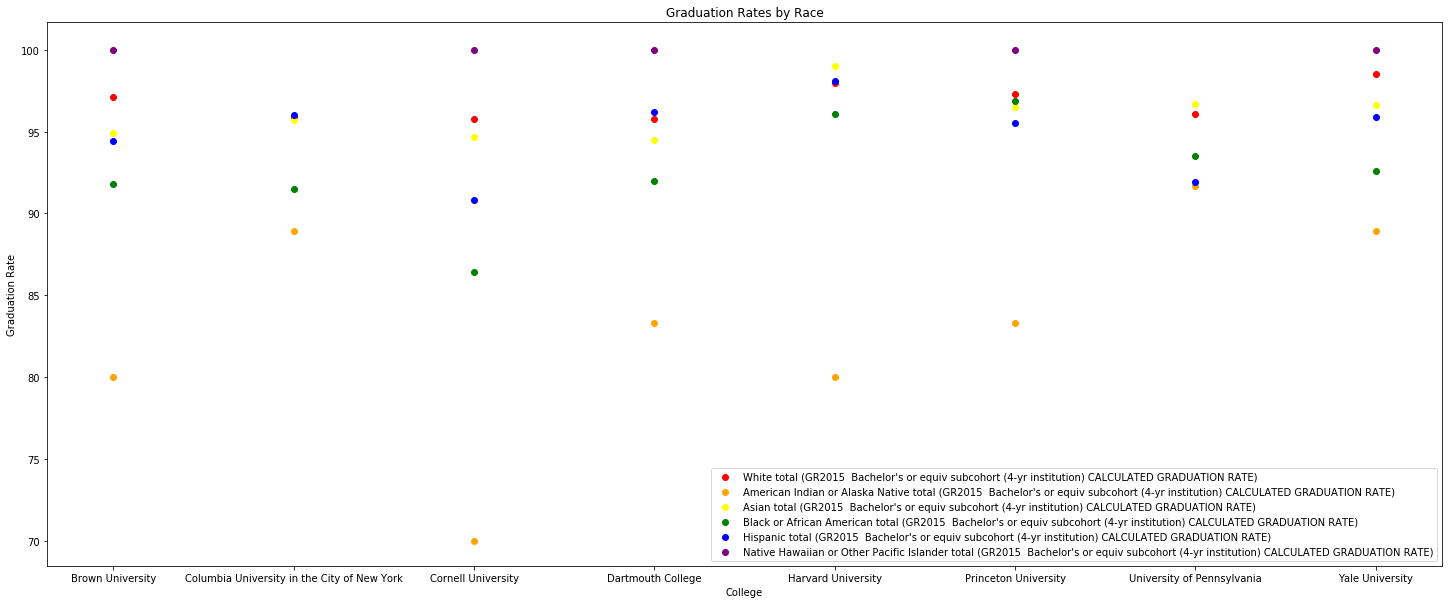

In [12]:
x = grad_rates['Institution Name']
white = grad_rates["White total (GR2015  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
indigenous = grad_rates["American Indian or Alaska Native total (GR2015  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
asian = grad_rates["Asian total (GR2015  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
black = grad_rates["Black or African American total (GR2015  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
hispanic = grad_rates["Hispanic total (GR2015  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
pacific = grad_rates["Native Hawaiian or Other Pacific Islander total (GR2015  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]


plt.figure(figsize=(25,10))
plt.scatter(x, white, color='red')
plt.scatter(x, indigenous, color='orange')
plt.scatter(x, asian, color='yellow')
plt.scatter(x, black, color='green')
plt.scatter(x, hispanic, color='blue')
plt.scatter(x, pacific, color='purple')


plt.xlabel('College')
plt.ylabel('Graduation Rate')
plt.title('Graduation Rates by Race')
plt.legend(loc="lower right")
plt.show()



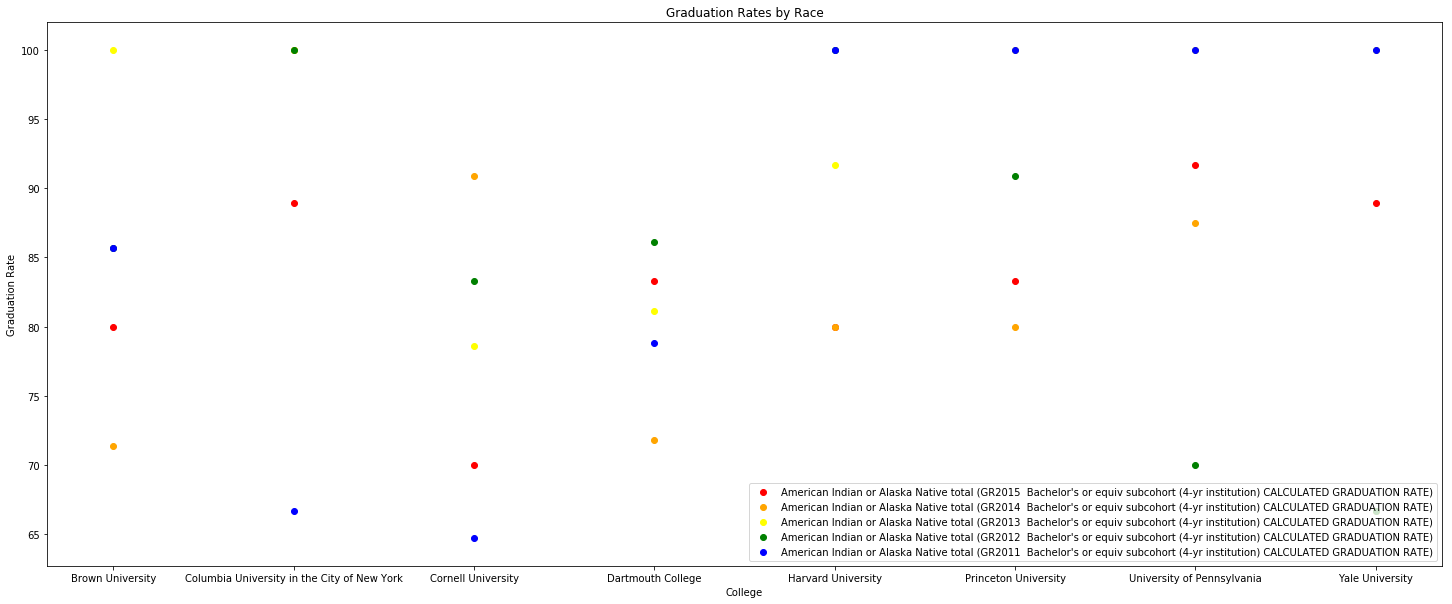

In [13]:
a = grad_rates["American Indian or Alaska Native total (GR2015  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
b = grad_rates["American Indian or Alaska Native total (GR2014  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
c = grad_rates["American Indian or Alaska Native total (GR2013  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
d = grad_rates["American Indian or Alaska Native total (GR2012  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]
e = grad_rates["American Indian or Alaska Native total (GR2011  Bachelor's or equiv subcohort (4-yr institution) CALCULATED GRADUATION RATE)"]


plt.figure(figsize=(25,10))
plt.scatter(x, a, color='red')
plt.scatter(x, b, color='orange')
plt.scatter(x, c, color='yellow')
plt.scatter(x, d, color='green')
plt.scatter(x, e, color='blue')


plt.xlabel('College')
plt.ylabel('Graduation Rate')
plt.title('Graduation Rates by Race')
plt.legend(loc="lower right")
plt.show()





# Expanded analysis to full dataset to run regression analyses

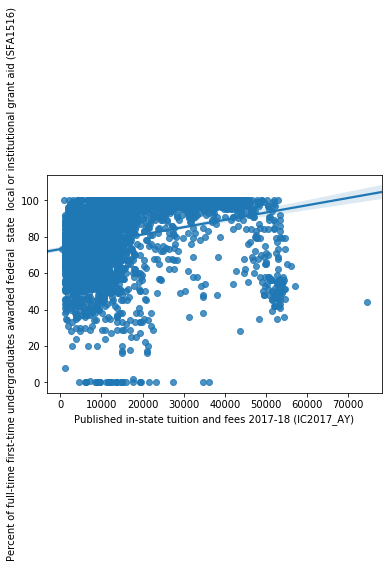

In [14]:
finances_combined = financial_aid.merge(cost_attendance)
finances_combined.head()

fig = sns.regplot(x="Published in-state tuition and fees 2017-18 (IC2017_AY)", 
            y="Percent of full-time first-time undergraduates awarded federal  state  local or institutional grant aid (SFA1516)", 
            data=finances_combined)



# I graphed these variables alone hoping to tease out why there seemed to be clustering around 100% of students awarded aid. Unresolved

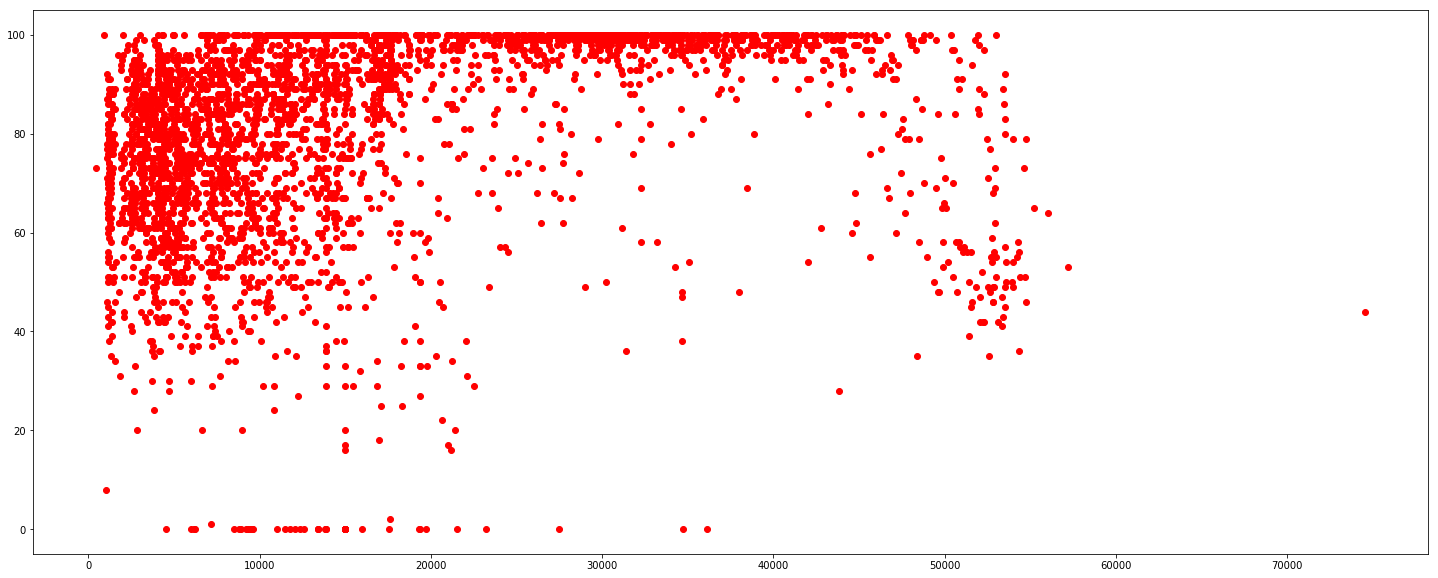

In [15]:
x = finances_combined["Published in-state tuition and fees 2017-18 (IC2017_AY)"]
y = finances_combined["Percent of full-time first-time undergraduates awarded federal  state  local or institutional grant aid (SFA1516)"]


plt.figure(figsize=(25,10))

plt.scatter(x, y, color='red')




/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



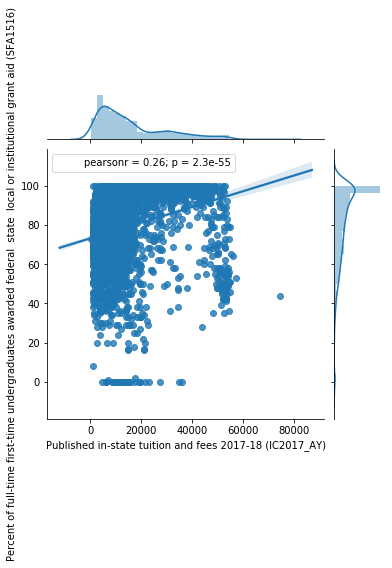

In [16]:
from scipy.stats import pearsonr


sns.jointplot(finances_combined["Published in-state tuition and fees 2017-18 (IC2017_AY)"], 
              finances_combined["Percent of full-time first-time undergraduates awarded federal  state  local or institutional grant aid (SFA1516)"],
              kind='reg', stat_func=pearsonr)

# This makes sense. I would have expected that institutions with lower admission rates have higher tuition and vice versa, and this regression shows that trend is generally true.

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



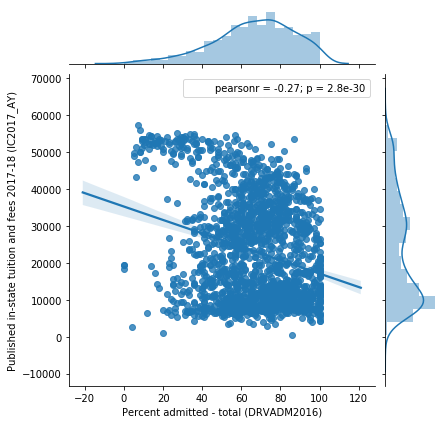

In [17]:
admissions_combined = institutions1.merge(cost_attendance)

sns.jointplot(admissions_combined["Percent admitted - total (DRVADM2016)"], 
              admissions_combined["Published in-state tuition and fees 2017-18 (IC2017_AY)"],
              kind='reg', stat_func=pearsonr)